# IMDB Movie Rating - Predictive Modeling

Let's prepare the data.
<br>
### 1. Data Preprocessing

Let's see the data again.

In [71]:
# import pandas to use its primary data structure
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [72]:
path = "movie_metadata.csv"

In [73]:
df = pd.read_csv(path)

In [74]:
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


The columns "aspect_ratio" and "movie_imdb_link" will be dropped because they have little or no effect on the ratings.

In [75]:
df = df.drop(['aspect_ratio', 'movie_imdb_link'], axis=1)

There are some variables that are not applicable for predicting the Imdb scores, such as "num_voted_users", "gross" because these numbers will be unavailable before a movie is released. So I will drop these columns.

In [76]:
df = df.drop(['gross', 'num_voted_users'], axis=1)

When fitting a multiple linear regression model, removing some variables to reduce multicollinearity is necessary. Since correlation matrix and some regression plots above suggest multicollinearity exists in those numeric variables, I am going to remove the following variables: "cast_total_facebook_likes", "num_critic_for_reviews", and "movie_facebook_likes".

In [77]:
df = df.drop(["cast_total_facebook_likes", "num_critic_for_reviews", "movie_facebook_likes"], axis=1)

Let's preprocess the data.
<br>
#### Data Preprocessing

In [78]:
# Let's see data type for each column
df.dtypes

color                       object
director_name               object
duration                   float64
director_facebook_likes    float64
actor_3_facebook_likes     float64
actor_2_name                object
actor_1_facebook_likes     float64
genres                      object
actor_1_name                object
movie_title                 object
actor_3_name                object
facenumber_in_poster       float64
plot_keywords               object
num_user_for_reviews       float64
language                    object
country                     object
content_rating              object
budget                     float64
title_year                 float64
actor_2_facebook_likes     float64
imdb_score                 float64
dtype: object

In [79]:
# Get the number of numeric columns
len(df._get_numeric_data().columns)

10

Let's check missing values in the dataset.

In [80]:
# text and categorical variables
df.select_dtypes(include = ['object']).isna().sum()

color              19
director_name     104
actor_2_name       13
genres              0
actor_1_name        7
movie_title         0
actor_3_name       23
plot_keywords     153
language           12
country             5
content_rating    303
dtype: int64

In [81]:
# numeric variables
df._get_numeric_data().isna().sum()

duration                    15
director_facebook_likes    104
actor_3_facebook_likes      23
actor_1_facebook_likes       7
facenumber_in_poster        13
num_user_for_reviews        21
budget                     492
title_year                 108
actor_2_facebook_likes      13
imdb_score                   0
dtype: int64

For the purpose of choosing numeric variables to predict the IMDB ratings, I will not take the variable "title_year" since intuitively it does not affect the scores. <br>
For text and categorical variables, I will specifically choose "genres", "content_rating" for prediction.

In [82]:
# Get column headers of numerical variables
df._get_numeric_data().columns

Index(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score'],
      dtype='object')

There are some numerical variables that I will remove rows with missing values because they only account for less than 5% of the sample. Those variables are 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes'. Missing values from other variables will be replaced by their medians.
<br>
For text and categorical variables, I will replace missing values with None.

In [83]:
# All numerical variables that will be used for prediction
numerical = ['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 
           'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'actor_2_facebook_likes']
# Numeric variables with missing values replaced with medians
numeric_variable = ['duration', 'facenumber_in_poster', 'num_user_for_reviews', 'budget']
categorical_variable = ['content_rating']
text_variable = ['genres']
# Numeric variables with missing values eliminated
remove_if_empty = ['director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes']

In [84]:
import numpy as np

# Remove numerical variables with missing values account for less than 5% of the sample
df = df.dropna(axis = 0, how = 'any', subset = remove_if_empty)
# Reset index of the data
df = df.reset_index(drop = True)
# Replace missing values with None in categorical variable
for category in categorical_variable:
    df[category] = df[category].fillna('None').astype('category')
# Replace missing values with medians in numeric variable
for numeric in numeric_variable:
    df[numeric] = df[numeric].fillna(df[numeric].median()).astype(np.float)

Let's scale the numerical variable.
<br>


In [85]:
df[numerical].describe()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes
count,4919.000000,4919.000000,4919.00000,4919.000000,4919.000000,4919.000000,4.919000e+03,4919.000000
mean,108.205936,689.028868,651.20553,6682.873145,1.367554,276.777394,3.831779e+07,1678.900183
std,22.509121,2818.741681,1681.08616,15166.768749,2.012843,380.523370,1.983041e+08,4083.278694
min,7.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2.180000e+02,0.000000
25%,94.000000,7.000000,133.00000,622.000000,0.000000,68.000000,7.000000e+06,284.000000
50%,104.000000,49.000000,372.00000,997.000000,1.000000,160.000000,2.000000e+07,600.000000
75%,118.000000,197.000000,637.00000,11000.000000,2.000000,331.000000,4.000000e+07,922.000000
max,330.000000,23000.000000,23000.00000,640000.000000,43.000000,5060.000000,1.221550e+10,137000.000000


In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[numerical])
scaled_data = scaler.transform(df[numerical])
scaled_data.shape

(4919, 8)

Let's preprocess the categorical variable.
<br>

In [87]:
# Split the genres
genres=df['genres'].str.get_dummies()
# Give it the float type
genres=genres.astype('float')

genre_list = genres.columns.to_list()
# Convert it to numpy array
genres = genres.to_numpy()
print(genres.shape)
print(genre_list)

(4919, 24)
['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']


In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

# get the list of column headers of content rating
myset = set(df['content_rating'].to_list())
content = list(myset)

label_encoder = LabelEncoder()
label_encoded_data = label_encoder.fit_transform(df[categorical_variable]) 
label_binarizer = LabelBinarizer()
label_binarized_data = label_binarizer.fit_transform(label_encoded_data) 
print(label_binarized_data.shape)
print(content)

(4919, 16)
['G', 'TV-14', 'Not Rated', 'Passed', 'R', 'X', 'GP', 'Approved', 'NC-17', 'TV-PG', 'None', 'PG', 'PG-13', 'M', 'Unrated', 'TV-G']


C:\Users\minhs\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Concatenate the data and get the labels.

In [89]:
# Get the list of column headers for later use
predictors = numerical + genre_list + content
# Concatenate the data
data = np.concatenate((scaled_data, genres, label_binarized_data),axis = 1)
labels = df['imdb_score'].to_numpy()
print(data.shape)
print(labels.shape)

(4919, 48)
(4919,)


Let's split the data into training set and test set.

In [90]:
from sklearn.model_selection import train_test_split
# split the data with the proportion of 80% for training set and 20% for the test set
RANDOM_STATE = 40
TEST_SIZE = 0.2
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=TEST_SIZE,random_state=RANDOM_STATE)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3935, 48)
(984, 48)
(3935,)
(984,)


### 2. Predictive Modeling

Let's build some models. I will use Multiple Linear Regression as a baseline model, followed by Random Forest, The Lasso Regression, Ridge Regression, and finally the Support Vector Machine for Regression model.

Let's define the function to evaluate the performance of our predictive models.

In [91]:
from sklearn.metrics import r2_score, mean_squared_error

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('-------------------------------------------------------------------------------')
    print('Model Performance')
    print('Coefficient of determination R^2 of the prediction: {:0.4f}'.format(model.score(X_test, y_test)))
    print('Mean Square Error MSE = {:0.4f}'.format(mean_squared_error(y_test, y_pred))) 

### Multiple Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression
# define multiple linear regression model
linear_regression = LinearRegression()
# fit the model to data and labels
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [93]:
# Let's see how linear regression perform
evaluate(linear_regression, X_test, y_test)

-------------------------------------------------------------------------------
Model Performance
Coefficient of determination R^2 of the prediction: 0.3243
Mean Square Error MSE = 0.8338


In [94]:
# Let's see the coefficients of this linear regression model

intercept = linear_regression.intercept_
features = pd.DataFrame(linear_regression.coef_, predictors, columns=['coefficient'])
features.head(10).to_csv('mlr_coef_head.csv')
features.head(10)

,coefficient
duration,0.213689
director_facebook_likes,0.075667
actor_3_facebook_likes,-0.009313
actor_1_facebook_likes,0.051142
facenumber_in_poster,-0.045240
num_user_for_reviews,0.318227
budget,0.009707
actor_2_facebook_likes,0.002677
Action,-0.229183
Adventure,-0.001409


### Random Forest Regressor

The Random Forest is one of the most effective machine learning models for predictive analytics, making it an industrial workhorse for machine learning.
<br> <br>
We are going to use the RandomizedSearchCV for the purpose of tuning hyper-parameter. First we need to create a parameter grid to sample from during fitting.

#### Random Hyperparameter Grid

In [95]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2100, num = 11)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


#### Random Search Training
<br>
Now, we begin the random search and fit it like any Scikit-Learn model.

In [96]:
from sklearn.ensemble import RandomForestRegressor

# First create the base model to tune
random_forest = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 21.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

Take a look at the best parameters from fitting the random search.

In [97]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

#### Evaluate the Random Search

To check if the random search yielded a better model, we compare the base model with the best random search model.

Let's define a random forest baseline model.

In [98]:
RFC_METRIC = 'mse'  # metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 # number of estimators used for RandomForrestClassifier
NO_JOBS = 4 # number of parallel jobs used for RandomForrestClassifier

# define the random forest regression model
rf_baseline = RandomForestRegressor(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

Let's train the random forest baseline model.

In [99]:
rf_baseline.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=False, random_state=40, verbose=False,
           warm_start=False)

In [100]:
# Let's see how it perform
evaluate(rf_baseline, X_test, y_test)

-------------------------------------------------------------------------------
Model Performance
Coefficient of determination R^2 of the prediction: 0.4171
Mean Square Error MSE = 0.7193


In [101]:
# Now come back to see our random search model performance
evaluate(rf_random, X_test, y_test)

-------------------------------------------------------------------------------
Model Performance
Coefficient of determination R^2 of the prediction: 0.4563
Mean Square Error MSE = 0.6709


We can see that the random search model has MSE of 0.6709 and multiple R-squared score of 0.4563, meaning that 45.63% of the variability can be explained by this model, while the random forest baseline model only achieves 41.71%. So the random search model gets improved in accuracy.

Let's visualize the features importance.

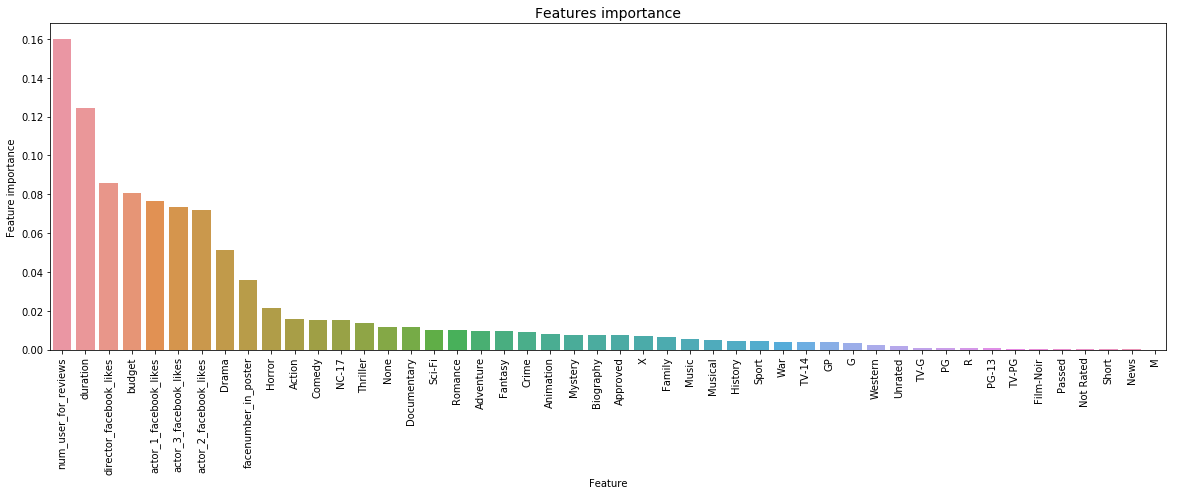

In [102]:
# Get the best random search model with the best hyperparameters
random_forest = RandomForestRegressor(n_estimators = 500,
                                 min_samples_split = 2,
                                  min_samples_leaf = 1,
                                      max_features = 'sqrt',
                                         max_depth = 60,
                                         bootstrap = False)
# Fit it to the data
random_forest.fit(X_train, y_train)

# Get the features importance and put it in the dataframe
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': random_forest.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (20,6))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

So we can see that number of user for reviews, duration and director facebook popularity are the most important features that affect a movie rating respectively. The next will be budget, leading actor facebook popularity and supporting actor social media popularity.

Let's examine the Lasso model.

### The Lasso 
<br>
LASSO regression is a variation of linear regression specifically adapted for data that shows heavy multicollinearity. Standing for Least Absolute Shrinkage and Selection Operator, LASSO uses shrinkage, a process in which data values are shrunk towards a central point.
<br>
<br>
LASSO regression uses L1 regularization, meaning it weights errors at their absolute value (instead of L2 regularization, which weights errors at their square to punish higher errors more).

Let's do the Grid Search Training first.

In [103]:
# Set the hyperparameters for our Grid Search training.
alpha = list(np.linspace(0.0001,2,num=2000))

lasso_params = {'alpha': alpha}

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Create the base model to tune
lasso = Lasso()

# Grid search of parameters, using 5 fold cross validation, 
lasso_grid = GridSearchCV(estimator = lasso, param_grid = lasso_params, n_jobs = -1, cv = 5)

# Fit the grid search model
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.0011004502251125564, 0.0021009004502251126, 0.003101350675337669, 0.004101800900450226, 0.005102251125562782, 0.006102701350675339, 0.007103151575787895, 0.00810360180090045, 0.009104052026013007, 0.010104502251125563, 0.01110495247623812, 0.012105402701350677, 0.0131...9949977488744375, 1.99599819909955, 1.9969986493246625, 1.997999099549775, 1.9989995497748876, 2.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Let's see the best parameters from fitting the grid search.

In [105]:
lasso_grid.best_params_

{'alpha': 0.0021009004502251126}

Compare the baseline model (set alpha = 0.1) with the best Lasso grid search model.

In [106]:
# define the lasso baseline model with alpha = 0.1
lasso_baseline=Lasso(alpha = 0.1)
lasso_baseline.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Let's see the performance of this Lasso baseline model vs best Lasso grid search model.

In [107]:
# the performance of lasso baseline model
evaluate(lasso_baseline, X_test, y_test)

-------------------------------------------------------------------------------
Model Performance
Coefficient of determination R^2 of the prediction: 0.1819
Mean Square Error MSE = 1.0095


In [108]:
# Now come back to the performance of the best Lasso grid search model.
evaluate(lasso_grid, X_test, y_test)

-------------------------------------------------------------------------------
Model Performance
Coefficient of determination R^2 of the prediction: 0.3230
Mean Square Error MSE = 0.8354


We can see that the Lasso grid search model gives us better R-squared score at 0.3230, meaning that 32.3% of the variability can be explained in this model, while the lasso baseline model only gets 18.19%

Let's visualize the graph of error as a function of the regularization alpha

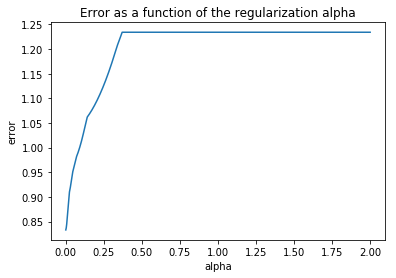

In [109]:
coefs = []
errors = []
lasso = Lasso()
alphas = np.linspace(0.0001,2,num=2000)

# Train the model with different regularisation strengths
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    errors.append(mean_squared_error(y_test, lasso.predict(X_test)))

# Show the results
ax = plt.gca()
ax.plot(alphas, errors)

plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Error as a function of the regularization alpha')
plt.show()

Let's see how well the Ridge Regression model will be doing.

### Ridge Regression
<br>
Ridge regression is very similar to LASSO regression in that it applies shrinking. But the largest difference between the two is that Ridge utilizes L2 regularization.

Let's do the Grid Search Training.

In [110]:
# Set the hyperparameters for our Grid Search training.
alpha = list(np.logspace(-6, 6, 2000))

ridge_params = {'alpha': alpha}

In [111]:
from sklearn.linear_model import Ridge

# Create the base model to tune
ridge = Ridge()

# Grid search of parameters, using 5 fold cross validation, 
ridge_grid = GridSearchCV(estimator = ridge, param_grid = ridge_params, n_jobs = -1, cv = 5)

# Fit the grid search model
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [1e-06, 1.0139183931162992e-06, 1.0280305078995382e-06, 1.0423390406440325e-06, 1.0568467251721823e-06, 1.071556333356802e-06, 1.086470675650722e-06, 1.1015926016237598e-06, 1.116925000507166e-06, 1.1324708017456474e-06, 1.1482329755570736e-06, 1.1642145334999749e-06, 1.18041852....0517677875, 946211.0031490889, 959380.7398618876, 972733.7781474893, 986272.6692692509, 1000000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Let's see the best parameters from fitting the grid search.

In [112]:
ridge_grid.best_params_

{'alpha': 6.507388018552649}

Compare the baseline model with the best Ridge regression grid search model.

In [113]:
# define the Ridge regression baseline model with default alpha
ridge_baseline=Ridge()
ridge_baseline.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Let's see the performance of this Ridge baseline model vs best Ridge regression grid search model.

In [114]:
# the performance of ridge baseline model
evaluate(ridge_baseline, X_test, y_test)

-------------------------------------------------------------------------------
Model Performance
Coefficient of determination R^2 of the prediction: 0.3264
Mean Square Error MSE = 0.8312


In [115]:
# Now come back to the performance of the best ridge regression grid search model.
evaluate(ridge_grid, X_test, y_test)

-------------------------------------------------------------------------------
Model Performance
Coefficient of determination R^2 of the prediction: 0.3272
Mean Square Error MSE = 0.8302


The Ridge regression grid search model gives us a slightly better R-squared score at 0.3272 and Mean Square Error at 0.8302

Let's visualize the graph of error as a function of alpha.

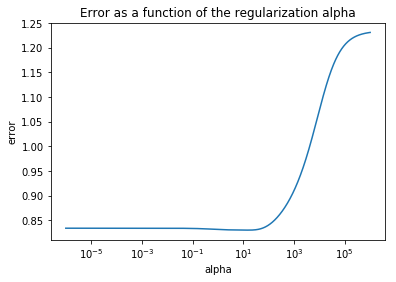

In [116]:
errors = []
ridge = Ridge()
alphas = np.logspace(-6, 6, 2000)

# Train the model with different regularisation strengths
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    errors.append(mean_squared_error(y_test, ridge.predict(X_test)))

# Show the results
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')

plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Error as a function of the regularization alpha')
plt.show()

Let's do the Support Vector Machine Regression model.

### Support Vector Regression

Let's do the Random Search Training first.

In [117]:
# Set the hyperparameters for our Random Search training.
kernel = ['linear', 'poly', 'rbf']
degree = [2, 3, 5]
gamma = ['scale', 'auto']
C = list(np.logspace(-2, 2, num=50))

svr_params = {
              'kernel': kernel,
              'degree': degree,
               'gamma': gamma,
                   'C': C
             }

In [118]:
from sklearn.svm import SVR

# Create the base model to tune
svr = SVR()

# Random search of parameters, using 3 fold cross validation, 
svr_grid = RandomizedSearchCV(estimator = svr, param_distributions = svr_params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
svr_grid.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.9min finished
C:\Users\minhs\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'kernel': ['linear', 'poly', 'rbf'], 'degree': [2, 3, 5], 'gamma': ['scale', 'auto'], 'C': [0.01, 0.012067926406393288, 0.014563484775012436, 0.017575106248547922, 0.021209508879201904, 0.025595479226995357, 0.030888435964774818, 0.0372759372031494, 0.04498432668969444, 0.054286...9.06939937054613, 47.1486636345739, 56.89866029018293, 68.66488450042998, 82.86427728546842, 100.0]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

Let's see the best parameters from fitting the random search.

In [119]:
svr_grid.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 2.811768697974228}

Compare the baseline model with the best SVR random search model.

In [120]:
# define the SVR baseline model 
svr_baseline=SVR()
svr_baseline.fit(X_train,y_train)

C:\Users\minhs\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

Let's see the performance of this baseline model vs best SVR random search model.

In [121]:
# the performance of the baseline model
evaluate(svr_baseline, X_test, y_test)

-------------------------------------------------------------------------------
Model Performance
Coefficient of determination R^2 of the prediction: 0.3715
Mean Square Error MSE = 0.7756


In [122]:
# Now come back to the performance of the best SVR random search model.
evaluate(svr_grid, X_test, y_test)

-------------------------------------------------------------------------------
Model Performance
Coefficient of determination R^2 of the prediction: 0.4001
Mean Square Error MSE = 0.7402


So after searching for the best hyperparameters, we got the best SVR model with R-squared of 0.4, meaning that 40% of variability can be interpreted by the model. It's better than the baseline model which gets R-squared at 0.3715 and it also gets lower mean square error MSE.


Let's visualize the graph of MSE error as a function of regularization parameter C.

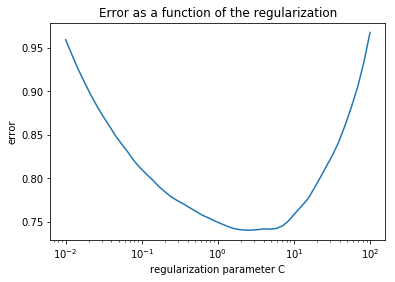

In [123]:
errors = []
svr = SVR(gamma = 'scale', degree = 2)
Cs = np.logspace(-2, 2, num=50)

# Train the model with different regularisation strengths
for c in Cs:
    svr.set_params(C=c)
    svr.fit(X_train, y_train)
    errors.append(mean_squared_error(y_test, svr.predict(X_test)))

# Show the results
ax = plt.gca()
ax.plot(Cs, errors)
ax.set_xscale('log')

plt.xlabel('regularization parameter C')
plt.ylabel('error')
plt.title('Error as a function of the regularization')
plt.show()

Let's put all results in a table and come to a conclusion.

In [124]:
models = {'Linear Regression     ': linear_regression,
          'Random Forest         ': rf_random,
          'The Lasso             ': lasso_grid,
          'Ridge Regression      ': ridge_grid,
          'Support Vector Machine': svr_grid}

def test(models, X_test, y_test):
    results = {}
    for i in models:
        y_pred = models[i].predict(X_test)
        results[i] = [models[i].score(X_test, y_test), mean_squared_error(y_test, y_pred)]
    return pd.DataFrame(results,index = ['R-squared', 'Mean Square Error'])

In [127]:
test(models, X_test, y_test).to_csv('Comparison of 5 models.csv')
test(models, X_test, y_test)

,Linear Regression,Random Forest,The Lasso,Ridge Regression,Support Vector Machine
R-squared,0.324302,0.456307,0.322987,0.327229,0.400137
Mean Square Error,0.833810,0.670916,0.835434,0.830199,0.740230


## Conclusion
<br>
From five machine learning algorithms we have conducted, Random Forest Regressor gets the best results with the highest R-squared, meaning that it has the highest variability that can be interpreted by the model. Random Forest also got the lowest Mean Square Error.
<br><br>
The second best model here is the Support Vector Machine for regression. Even with this one, we can improve more on its performance if we have more computing power.
<br><br>
It is suggested that we can achieve better results along with collecting more data from the Imdb Movie database.